# First Jupyter notebook project

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_excel('/Users/georgeanton/Desktop/VSCode/default_of_credit_card_clients__courseware_version_1_21_19.xls')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [7]:
df.columns, df.shape

(Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
        'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
        'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
        'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
        'default payment next month'],
       dtype='object'),
 (30000, 25))

__LIMIT_BAL__ : Amount of credit provided (in New Taiwanese (NT) dollar) including consumer credit and family (supplemental) credit <br>
__SEX__: Gender (1 = male; 2 = female) <br>
__EDUCATION__: Education (1 = grad school; 2 = university; 3 = high school; 4=other) <br>
__MARRIAGE__: Marital Status (1 = married; 2 = single; 3 =others) <br>
__AGE__: Age (years) <br>
__PAY_1-PAY_6__: A record of past payments. Past monthly payments, recorded from April to September. (i.e. PAY_1 = September, PAY_2 = August, ... , PAY_6 = April). __Values__ for repayment status: (-1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; ... , 8 = payment delay for eight months, 9 = payment delay for nine months and above). <br>
__BILL_AMT1-BILL_AMT6__: Bill statement amount (in NT dollar). BILL_AMT1 = bill statement amount in September,...,BILL_AMT6 = bill statement amount in April. <br>
__PAY_AMT1-PAY_AMT6__: Amount of previous payment (NT dollar). PAY_AMT1 = amount paid in September,..., PAY_AMT6 = amount paid in April. <br>

In [9]:
#assert df['ID'].nunique() == df.shape[0]
df['ID'].nunique(), df.shape[0]

(29687, 30000)

As the number of uniquie IDs is less than the number of rows, we will begin to determine which ones are not unique and filter out our dataset.

In [24]:
id_counts = df['ID'].value_counts()
#id_counts = id_counts[id_counts>1]
#running value_counts() twice displays the number of grouped duplicated entries (alternative to boolean masking)
id_counts.value_counts() 

1    29374
2      313
Name: ID, dtype: int64

In [29]:
dupe_mask = id_counts == 2

Create list of duplicate id's using boolean masking on the index of the id_counts series.

In [32]:
dupe_ids = id_counts.index[dupe_mask]
dupe_ids = list(dupe_ids)
len(dupe_ids) #sanity check

313

Going to use __.loc__ method to mask dataframe on row indices containing duplicate id's. <br>
Will focus on first 3 id's in the list, as this will give us an overview of what the duplicate values look like

In [35]:
df.loc[df['ID'].isin(dupe_ids[0:3]),:].head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,...,169371,172868,150827,8000,8000,5500,6100,6000,5000,0
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16727,1fb3e3e6-a68d,80000,1,2,2,33,2,2,0,0,...,27394,29922,31879,0,2000,2000,3000,2600,0,1
16827,1fb3e3e6-a68d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29685,ad23fe5c-7b09,50000,1,3,1,32,0,0,0,0,...,12882,8131,3983,3000,2871,1000,163,3983,3771,1
29785,ad23fe5c-7b09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We notice that the duplicated values seem to be rows of all zeros (aside from the ID column). Will boolean mask the dataframe to check for values of zero.

In [37]:
df_zero_mask = df == 0
df_zero_mask.shape

(30000, 25)

The .all() method returns True if and only if every column in that row is True. <br>
This will be applied along all the columns (excluding the first/ID col) of the Boolean matrix we created <br>
Thus we will have a Boolean series where the index of a row of 0's will correspond to a value of 1.

In [41]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)
sum(feature_zero_mask)

315

Now to clean the dataframe from rows with all zeros.

In [42]:
df_clean_1 = df.loc[~feature_zero_mask,:].copy() #Used negation operator to select all rows that don't have zeros for all features
#and we're creating a copy of the DF rather than use the original.

In [43]:
assert df_clean_1['ID'].nunique() == df_clean_1.shape[0] #if this passes, we successfully cleaned the DF to show all unique ID's 

In [44]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

In [45]:
df_clean_1['PAY_1'].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

Values corresponding to 0 are not valid for the PAY_1 attribute

In [62]:
df_clean_1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [63]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
assert sum(valid_pay_1_mask) == df_clean_1.shape[0] - 3021 #3021 = df_clean_1['PAY_1'].value_counts().loc['Not available']

In [73]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()
#df_clean_2 = df_clean_1[valid_pay_1_mask].copy() #is an alternative method
assert df_clean_2.shape[0] == sum(valid_pay_1_mask) #sanity check
#df_clean_2['PAY_1'].value_counts() #alternative way to sanity check

In [77]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2[['PAY_1','PAY_2']].info() #sanity check

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


__Additional Info__ <br>
__PAY_1__: (-2 = account started current month with zero balance and never used credit, -1 = had a balance that was paid in full, <br>
0 = at least the minimum payment was made, but entire balance wasn't paid (i.e. positive balance carried onto next month))

In [86]:
import matplotlib.pyplot as plt 
import matplotlib as mpl
%matplotlib inline 

mpl.rcParams['figure.dpi'] = 100 #high resolution figures (dpi = dots per inch)

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'AGE'}>]], dtype=object)

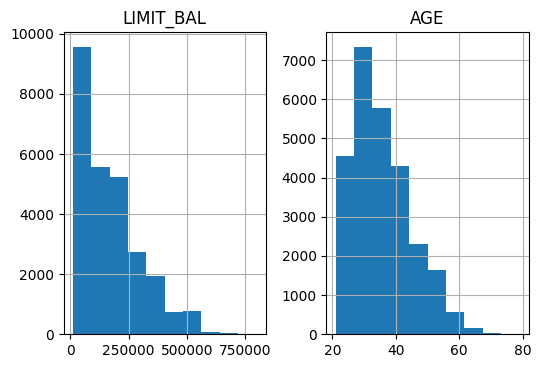

In [87]:
df_clean_2[['LIMIT_BAL','AGE']].hist()

Above we visualized the Limit Balance and Age features look like with respect to their frequency in our data set.
Below I will use __.describe__ to get the summary statistics with regards to those two features <br>

__Remark__: Currency Conversion: 1 USD approx. 30 NT dollars <br>

Also note that there is no one under 21 years of age with a credit account, which lends to the credibility of the data.

In [91]:
df_clean_2[['LIMIT_BAL','AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [92]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

As values 0,5,6 are not documented, we will lump it in with 4='others'.

In [93]:
df_clean_2['EDUCATION'].replace(to_replace=[0,5,6], value=4, inplace=True)
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [94]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

As 0 is not documented here, will lump it with 3='others'.

In [134]:
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

Will visualize Education to see whether it assumes a linear relationship (i.e. column: default payment next month on y with respect to education level, but taking into account the mean of these independent values)

Text(0.5, 0, 'Education level: ordinal encoding')

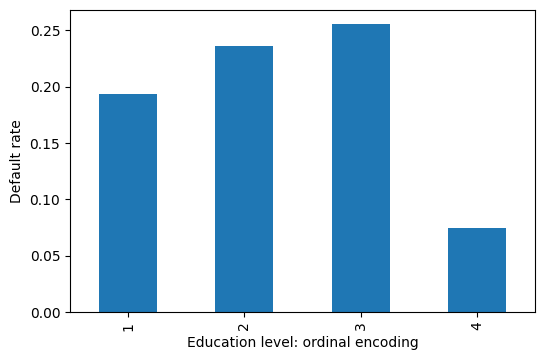

In [132]:
df_clean_2.groupby('EDUCATION').agg(func={'default payment next month':'mean'}).plot.bar(legend=False) #func=dict of axis labels -> functions for .agg()
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')

It seems a straight-line fit would be describe this data, to fit such a non-linear effect perhaps decision trees or random forests might help. <br>
If wanted a linear model such as logistic regression, perhaps ditching the ordinal encoding and choosing a different encoding might help, a popular way of encoding is __one-hot encoding (OHE)__. 

Now we implement __OHE__ for a Categorical Feature (transform categorical/raw data to numeric) <br>

Specifically reverse engineer __EDUCATION__.

In [135]:
df_clean_2['EDUCATION_CAT'] = 'none'
df_clean_2[['EDUCATION','EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [136]:
cat_mapping={1:'graduate school', 2:'university',3:'high school', 4:'others'}
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION','EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


The pandas __get_dummies()__ function allows us to create the OHE by creating a new df with as many columns as there are levels (in this case 4) of the categorical variable.

In [138]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


We will concatenate (via axis=1, horizontally) i.e. (append to the right) the edu_ohe dataframe to the df_clean_2 df.

In [140]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT','graduate school','university','high school','others']].head(10)

,EDUCATION_CAT,graduate school,university,high school,others
0,university,0,1,0,0
1,university,0,1,0,0
2,university,0,1,0,0
3,university,0,1,0,0
4,university,0,1,0,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,1,0,0
8,high school,0,0,1,0
9,high school,0,0,1,0


Now to save the dataframe for future use.

In [147]:
df_with_ohe.to_csv('/Users/georgeanton/Desktop/VSCode/cleaned_data.csv', index=False)

In [151]:
import sys
!{sys.executable} -m pip install install openpyxl


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     |████████████████████████████████| 242 kB 3.1 MB/s 
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew 

In [152]:
df_with_ohe.to_excel('/Users/georgeanton/Desktop/VSCode/cleaned_data.xlsx',index=False)